In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

In [2]:
forest = pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
#no null values
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
forest['size_category']=label_encoder.fit_transform(forest['size_category'])

#(using label encoder)

In [5]:
corr=forest.iloc[:,2:10].corr()
corr

#(correlation of all the variables)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000


<Axes: >

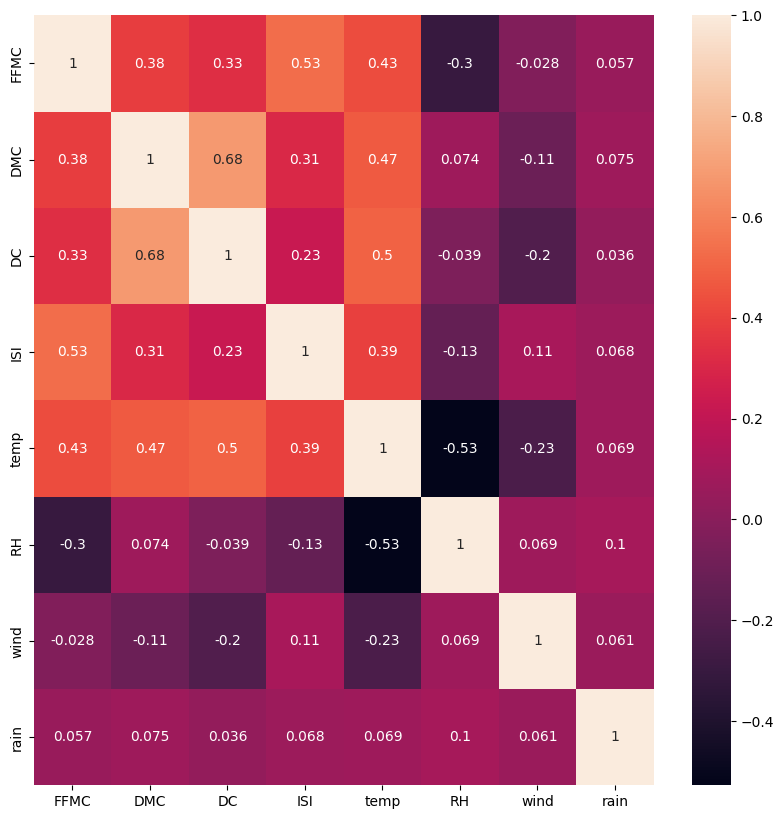

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

[<Axes: xlabel='area'>, <Axes: xlabel='area'>]

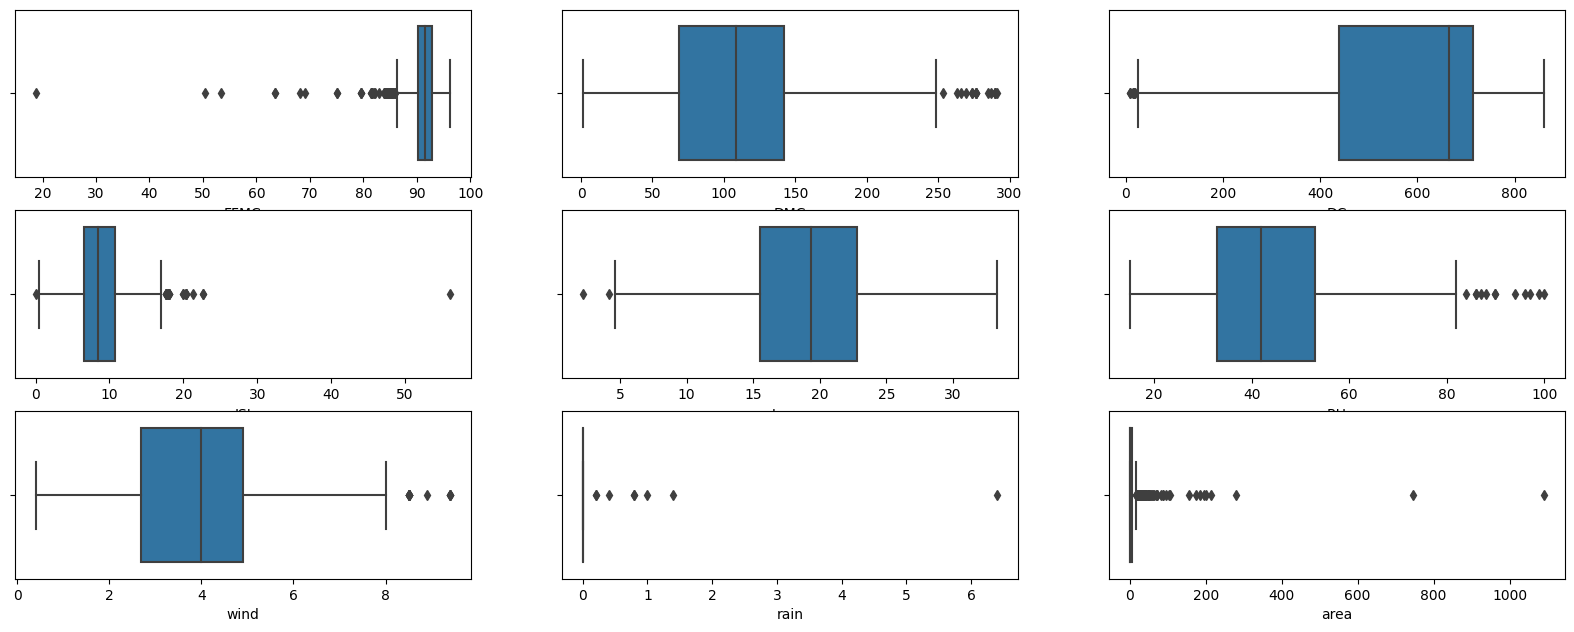

In [7]:
plt.figure(figsize=(20,10))

[plt.subplot(4,3,1), sns.boxplot(x=forest["FFMC"])];

[plt.subplot(4,3,2), sns.boxplot(x=forest["DMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=forest["DC"])];

[plt.subplot(4,3,4), sns.boxplot(x=forest["ISI"])];

[plt.subplot(4,3,5), sns.boxplot(x=forest["temp"])];

[plt.subplot(4,3,6), sns.boxplot(x=forest["RH"])];

[plt.subplot(4,3,7), sns.boxplot(x=forest["wind"])];

[plt.subplot(4,3,8), sns.boxplot(x=forest["rain"])];

[plt.subplot(4,3,9), sns.boxplot(x=forest["area"])]

<ipython-input-19-642a63d00059>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='r',shade=True);
<ipython-input-19-642a63d00059>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='r',shade=True);
<ipython-input-19-642a63d00059>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='r',shade=True);
<ipython-input-19-642a63d00059>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='r',shade=True);
<ipython-input-19-642a63d000

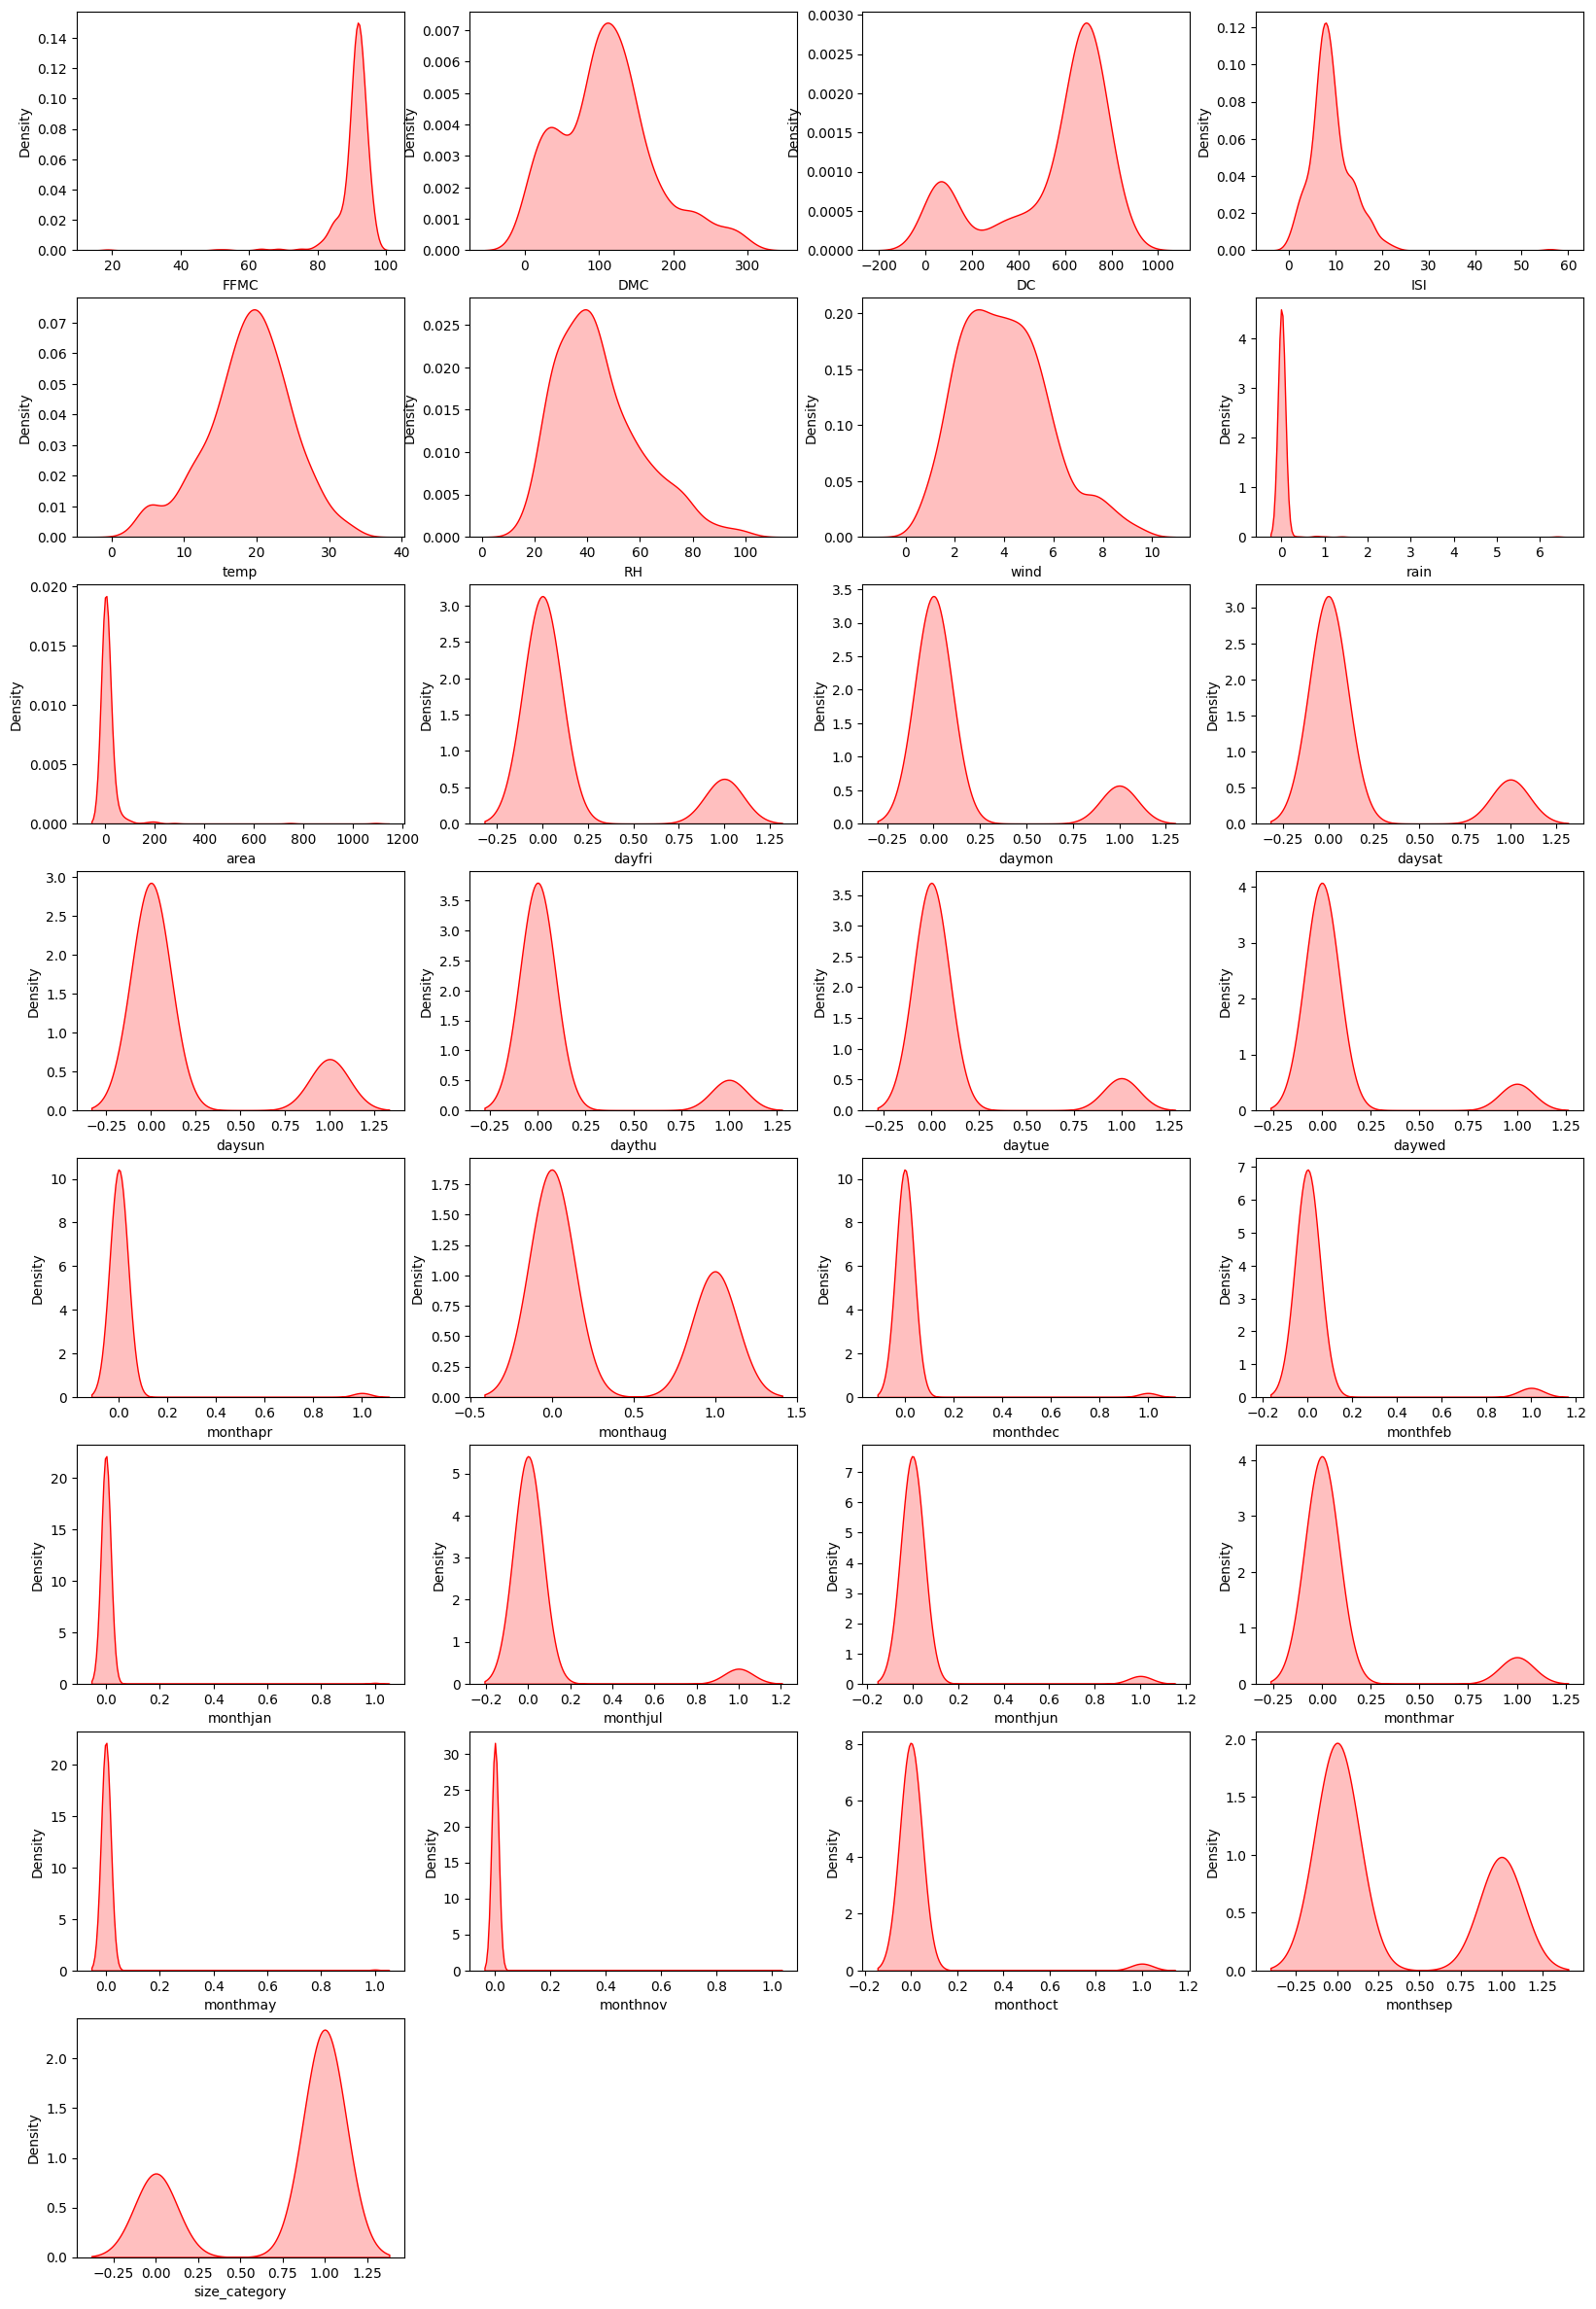

In [19]:
no_columns = forest.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[column],color='r',shade=True);

In [9]:
X = forest.iloc[:,2:10]
Y = forest.iloc[:,-1]
X

#(seperating the traning and testing data)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [10]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [20]:
#assigning to training the testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((361, 8), (361,), (156, 8), (156,))

In [13]:
#gridsearchcv fo searing the best parameters
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(X_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 1/10; 1/10] END C=0.0001, gamma=0.5, kernel=linear;, score=0.703 total time=   0.0s
[CV 2/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 2/10; 1/10] END C=0.0001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 3/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 3/10; 1/10] END C=0.0001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 4/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 4/10; 1/10] END C=0.0001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 5/10; 1/10] END C=0.0001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 6/10; 1/10] START C=0.0001, gamma=0.5, kernel=linear........................
[CV 6/10; 1

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [14]:
gsv.best_params_

#(best parameters)

{'kernel': 'rbf', 'gamma': 0.5, 'C': 10}

In [15]:
#score from this best parameters
gsv.best_score_

0.7284534534534535

In [16]:
clf = SVC(kernel='rbf',C=0.1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.64102564102564


array([[  0,  38],
       [  0, 118]])